In [1]:
#import libraries
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("gas_turbines.csv")
data.head()
#TEY is the variable we should predict.
#We need to consider only ambient Variables AT AP AH. Remaining features can be ignored.

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
df = data.drop(['AFDP','GTEP','TIT','TAT','CDP','CO','NOX'],axis=1)
df.head()

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [5]:
df.describe()

,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,134.188464
std,7.574323,6.41076,13.793439,15.829717
min,0.522300,985.85000,30.344000,100.170000
25%,11.408000,1008.90000,69.750000,127.985000
50%,18.186000,1012.80000,82.266000,133.780000
75%,23.862500,1016.90000,90.043500,140.895000
max,34.929000,1034.20000,100.200000,174.610000


<Axes: >

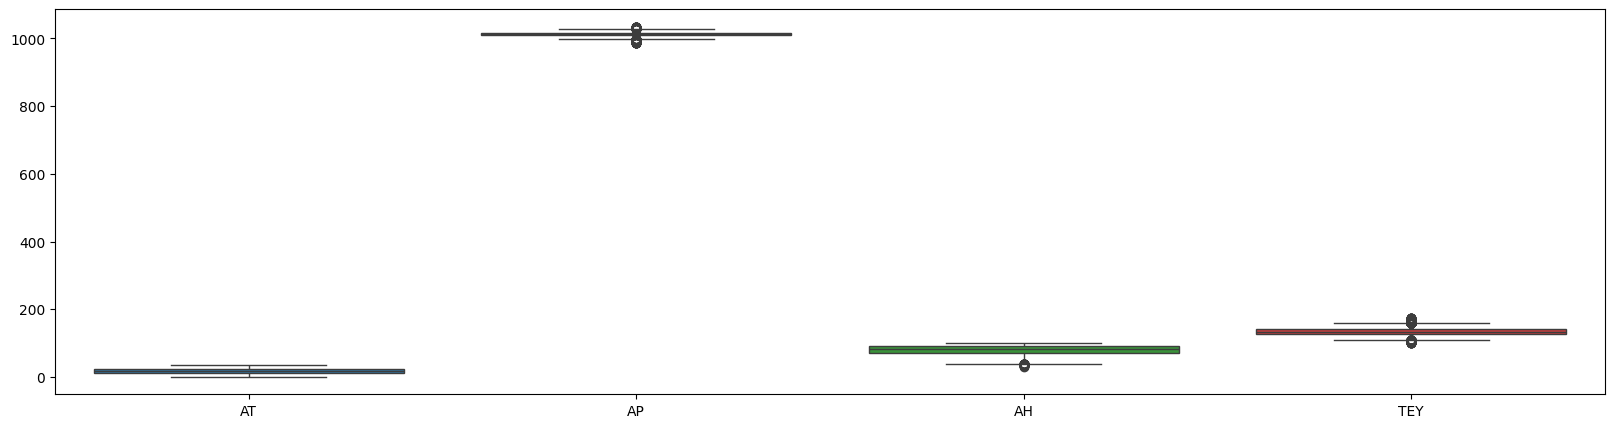

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,5))
sns.boxplot(data=df)

#split the data

In [7]:
from sklearn.model_selection import train_test_split

X =df.iloc[:,:-1]
Y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state=42)

In [8]:
y_train=np.reshape(y_train.to_numpy(), (-1,1))
y_test=np.reshape(y_test.to_numpy(), (-1,1))

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit the scalers only once using the training data
scaler_x.fit(X_train)
scaler_y.fit(y_train)

# Transform the training and testing data
xtrain_scaled = scaler_x.transform(X_train)
xtest_scaled = scaler_x.transform(X_test)

ytrain_scaled = scaler_y.transform(y_train.reshape(-1,1))
ytest_scaled = scaler_y.transform(y_test.reshape(-1,1))


In [10]:
len(xtrain_scaled)

10527

### Visualizing the data

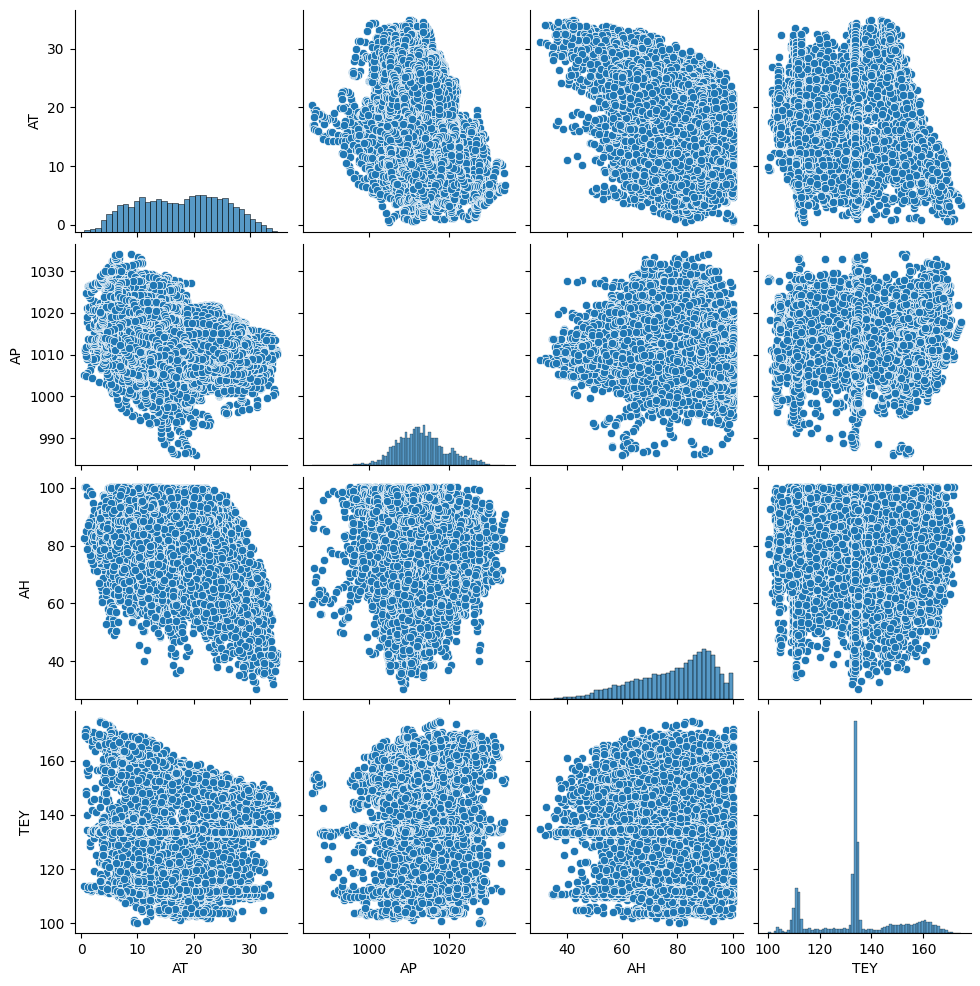

In [11]:
sns.pairplot(df)

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [13]:
import keras
keras. __version__ #init method is not available in this mdethod

'2.15.0'

In [14]:
model = Sequential()

# Input layer (features + 1 for bias)
model.add(Dense(xtrain_scaled.shape[1] + 1, activation='relu', input_shape=(xtrain_scaled.shape[1],)))

# Hidden layer (experiment with different configurations)
model.add(Dense(50, activation='relu'))  # Example with 50 neurons

# Output layer (1 neuron for regression)
model.add(Dense(1))


#'''The input layer has xtrain_scaled.shape[1] neurons (number of features) plus 1 for the bias unit.
#The hidden layer configuration is customizable based on your experiments. Here, we use 50 neurons with the ReLU activation function (a common choice).
#The output layer has 1 neuron for a continuous output (regression).'''

In [15]:
#Compile the Model:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [16]:
#Train the Model
hist = model.fit(xtrain_scaled, ytrain_scaled, epochs=100, batch_size=32, validation_data=(xtest_scaled, ytest_scaled), verbose=2)

Epoch 1/100
329/329 - 4s - loss: 0.0587 - mse: 0.0587 - val_loss: 0.0412 - val_mse: 0.0412 - 4s/epoch - 12ms/step
Epoch 2/100
329/329 - 2s - loss: 0.0411 - mse: 0.0411 - val_loss: 0.0408 - val_mse: 0.0408 - 2s/epoch - 7ms/step
Epoch 3/100
329/329 - 2s - loss: 0.0408 - mse: 0.0408 - val_loss: 0.0406 - val_mse: 0.0406 - 2s/epoch - 7ms/step
Epoch 4/100
329/329 - 1s - loss: 0.0404 - mse: 0.0404 - val_loss: 0.0402 - val_mse: 0.0402 - 656ms/epoch - 2ms/step
Epoch 5/100
329/329 - 1s - loss: 0.0401 - mse: 0.0401 - val_loss: 0.0397 - val_mse: 0.0397 - 797ms/epoch - 2ms/step
Epoch 6/100
329/329 - 1s - loss: 0.0398 - mse: 0.0398 - val_loss: 0.0403 - val_mse: 0.0403 - 638ms/epoch - 2ms/step
Epoch 7/100
329/329 - 1s - loss: 0.0396 - mse: 0.0396 - val_loss: 0.0390 - val_mse: 0.0390 - 659ms/epoch - 2ms/step
Epoch 8/100
329/329 - 1s - loss: 0.0393 - mse: 0.0393 - val_loss: 0.0389 - val_mse: 0.0389 - 644ms/epoch - 2ms/step
Epoch 9/100
329/329 - 1s - loss: 0.0391 - mse: 0.0391 - val_loss: 0.0388 - val_m

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 50)                250       
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 317 (1.24 KB)
Trainable params: 317 (1.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Model Evaluation

In [18]:
#Evaluate the Model

#Use the trained model to predict on the scaled test data (xtest_scaled).
#Inverse transform the predictions back to the original scale using the scaler:

predictions_scaled = model.predict(xtest_scaled)
predictions = scaler_y.inverse_transform(predictions_scaled)

141/141 [==============================] - 0s 1ms/step


In [19]:
#error metrics

In [20]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 209.55668809081038


In [21]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 14.476072951281035


In [22]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 11.340723226290223


In [23]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)

R-squared: 0.16953098288201118


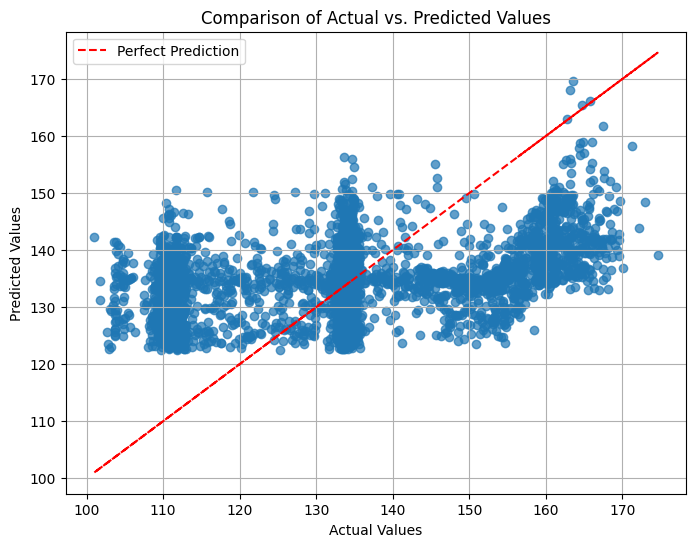

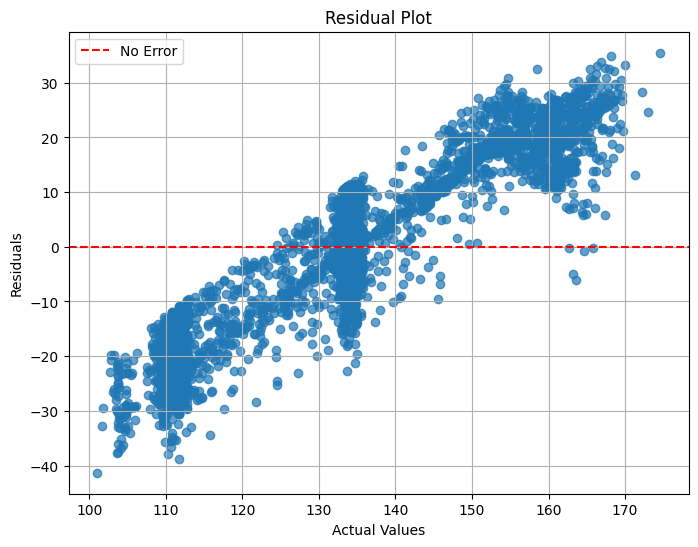

In [24]:
import matplotlib.pyplot as plt

# Assuming you have your predictions (`predictions`) and actual values (`y_test`)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of Actual vs. Predicted Values")
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')  # Add a reference line for perfect prediction
plt.legend()
plt.grid(True)
plt.show()

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test - predictions, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='red', linestyle='--', label='No Error')  # Add a reference line for zero error
plt.legend()
plt.grid(True)
plt.show()


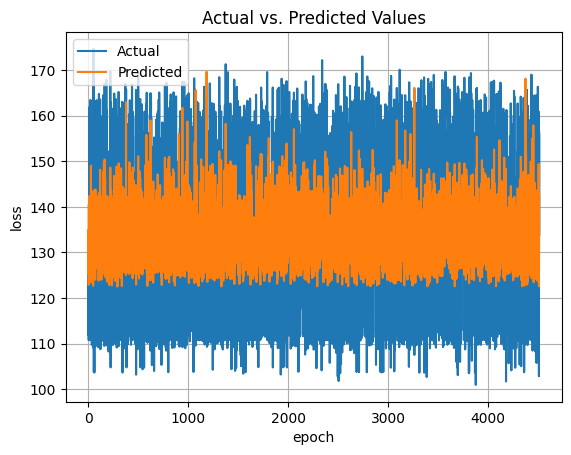

In [25]:
import matplotlib.pyplot as plt

# Assuming you have your original y_test and predictions (after inverse transform if scaled)

plt.plot(y_test)  # Plot actual values
plt.plot(predictions)  # Plot predicted values
plt.title('Actual vs. Predicted Values')
plt.ylabel('loss')  # Assuming target variable has meaningful units
plt.xlabel('epoch')  # More informative than 'epoch'
plt.legend(['Actual', 'Predicted'])
plt.grid(True)
plt.show()


In [26]:
print(hist.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


In [27]:
hist_df = pd.DataFrame(hist.history)
hist_df["epoch"]=hist.epoch
hist_df.tail()

,loss,mse,val_loss,val_mse,epoch
95,0.037763,0.037763,0.037972,0.037972,95
96,0.037709,0.037709,0.038222,0.038222,96
97,0.037810,0.037810,0.037707,0.037707,97
98,0.037752,0.037752,0.037872,0.037872,98
99,0.037797,0.037797,0.038031,0.038031,99


#### Visualize Training History

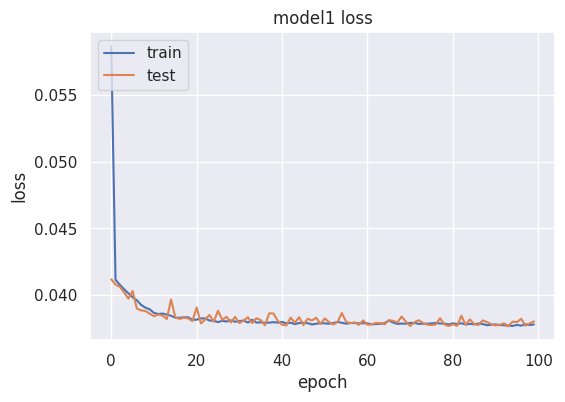

In [28]:
# summarize history for Loss

sns.set(rc={'figure.figsize':(6,4)})

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

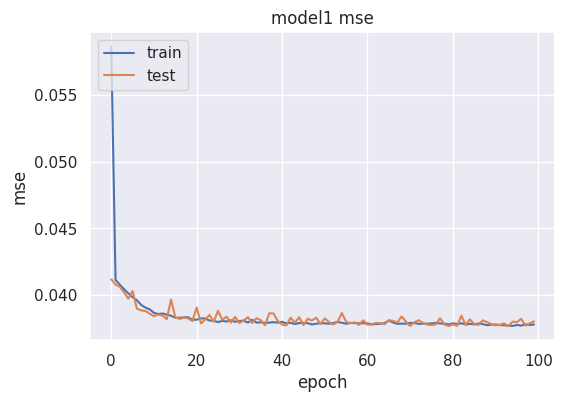

In [29]:
# summarize history for loss
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('model1 mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
